# Retrieval of average item prices at each store

In [2]:
import sys  
!{sys.executable} -m pip install --user matplotlib

  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
You should consider upgrading via the '/home/kiley/.pyenv/versions/3.8.0/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import re
import csv
from decimal import Decimal
import matplotlib.pyplot as plt

# initiate dictionaries storing cumulative information for each store
amount_totals = {}
item_totals = {}
average_item_prices = {}

# retrieve average item price at each store
transaction_amount = 0
with open('transactions.csv', mode='r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        if(row["STORE_ID"]):
            if(re.match("\d+\.*\d*", row["ITEM_QTY"]) and re.match("\d+\.*\d*", row["TRANS_USD"])):
                transaction_amount = Decimal(row["TRANS_USD"])

                if (row["STORE_ID"] in amount_totals):
                    # print(decimal)
                    amount_totals[row["STORE_ID"]] += float(row["TRANS_USD"])
                    item_totals[row["STORE_ID"]] += int(row["ITEM_QTY"])
                else:
                    amount_totals[row["STORE_ID"]] = float(row["TRANS_USD"])
                    item_totals[row["STORE_ID"]] = int(row["ITEM_QTY"])

# find average item prices
for key in amount_totals:
    average_item_prices[key] = round((amount_totals[key]/item_totals[key]), 2)

# Scatterplotting of stores' average item prices

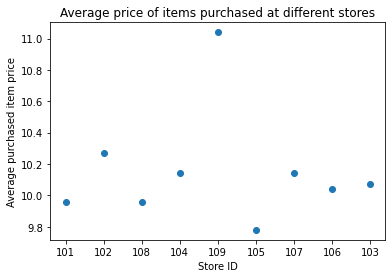

In [4]:
store_ids = list(average_item_prices.keys())
average_prices = list(average_item_prices.values())
plt.scatter(store_ids, average_prices)
plt.xlabel("Store ID")
plt.ylabel("Average purchased item price")
plt.title("Average price of items purchased at different stores")
plt.show()

# Finding Upper and Lower Bounds using Inter Quartile Range

In [25]:
average_prices.sort()

def median(price_list):
    if(len(price_list) % 2 == 1):
        index = len(price_list)//2
        median_price = price_list[index]
    if(len(price_list) % 2 == 0):
        index = (len(price_list)//2 + (len(price_list)//2 - 1))//2 + 1
        median_price = (price_list[len(price_list)//2] + price_list[len(price_list)//2 - 1])/2
    return median_price, index

# find median price
median_price, median_price_index = median(average_prices)
lower_quartile_price, lower_quartile_price_index = median(average_prices[0:median_price_index])
upper_quartile_price, upper_quartile_price_index = median(average_prices[median_price_index:len(average_prices)])

print("Median price: ", median_price)
print("Lower quartile price: ", lower_quartile_price)
print("Upper quartile price: ", upper_quartile_price)

Median price:  10.07
Lower quartile price:  9.96
Upper quartile price:  10.14


In [26]:
# print data points above and below upper and lower quartile prices
for key in average_item_prices:
    if(average_item_prices[key] < lower_quartile_price):
        print("Below lower quartile price: ", average_item_prices[key])
    if(average_item_prices[key] > upper_quartile_price):
        print("Above upper quartile price: ", average_item_prices[key])

Above upper quartile price:  10.27
Above upper quartile price:  11.04
Below lower quartile price:  9.78


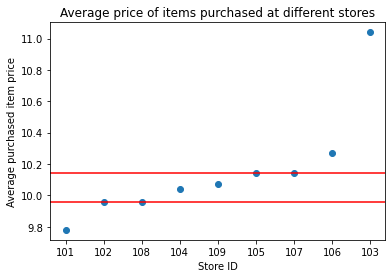

In [27]:
# represent upper and lower quartiles on plot
plt.scatter(store_ids, average_prices)
plt.xlabel("Store ID")
plt.ylabel("Average purchased item price")
plt.title("Average price of items purchased at different stores")
plt.axhline(y = 9.96, color = 'r', linestyle = '-')
plt.axhline(y = 10.14, color = 'r', linestyle = '-')
plt.show()